<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 9

### Problem 0 (5 points)

## Part 1: Impurity Measures 

### Problem 1.1

In [1]:
def error(q):
    p = 1 - q
    return 1 - np.maximum(p, q)

In [2]:
def gini(q):
    p = 1 - q
    return 1 - (p ** 2 + q ** 2)

In [3]:
def entropy(q):
    p = 1 - q
    impurity = q.copy()
    for i in range(len(q)):
        imp = 0
        if q[i] != 0.0:
            imp += q[i] * np.log(q[i])
        if p[i] != 0.0:
            imp += p[i] * np.log(p[i])
        impurity[i] = -1 * imp
    return impurity

In [4]:
def variance(q):
    p = 1 - q
    
    # Since only two labels, mean is just p
    newp = ((1 - p) ** 2) * p
    newq = ((0 - p) ** 2) * q
    return newp + newq

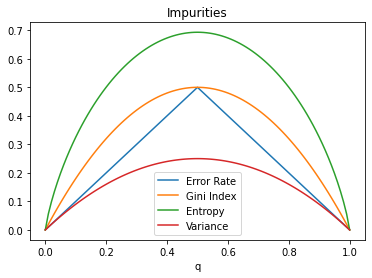

In [5]:
import matplotlib.pyplot as plt
import numpy as np

q = np.arange(0, 1.01, 0.01)
plt.plot(q, error(q), label = "Error Rate")
plt.plot(q, gini(q), label = "Gini Index")
plt.plot(q, entropy(q), label = "Entropy")
plt.plot(q, variance(q), label = "Variance")
plt.title("Impurities")
plt.xlabel("q")
plt.legend()
plt.show()

### Problem 1.2

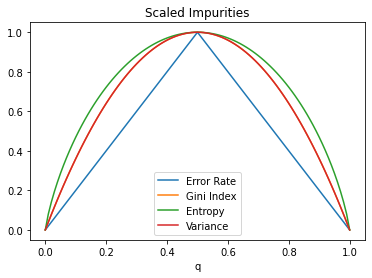

In [6]:
def scaled(impfunc, q):
    imp = impfunc(q)
    return imp / max(imp)

error_scaled = scaled(error, q)
gini_scaled = scaled(gini, q)
entropy_scaled = scaled(entropy, q)
variance_scaled = scaled(variance, q)

plt.plot(q, error_scaled, label = "Error Rate")
plt.plot(q, gini_scaled, label = "Gini Index")
plt.plot(q, entropy_scaled, label = "Entropy")
plt.plot(q, variance_scaled, label = "Variance")
plt.title("Scaled Impurities")
plt.xlabel("q")
plt.legend()
plt.show()

### Problem 1.3 (Exam Style)

In [7]:
print(max(gini(q)), max(variance(q)))

0.5 0.25


The Variance and Gini plots are identical.

We Gini index impurity for K = 2 in terms of q equals  
$i_s(g) = 1 - \sum ^{K-1}_{k=0} p^2_k$  
$= 1 - (q^2 + (1 - q)^2)$  
$= 1 - 1 + 2q - 2q^2$  
$= 2q - 2q^2$  
The max Gini index impurity is 0.5, so the scaled Gini index impurity equals  
$\frac{2q + 2q^2}{0.5} = 4q - 4q^2$

The Variance impurity equals
$i_v(g) = \sum^{K-1}_{k=0}(k - m)^2p_k$, where $m = \sum^{K-1}_{k=0}p_k$  
Since K = 2, the mean in terms of q equals  
$m = \sum^{K-1}_{k=0}kp_k = 0 * q + 1 * (1-q) = 1-q$  
Then, the new impurity score in terms of q equals  
$i_v(g) = \sum^{K-1}{k=0}(k - m)^2p_k = (0 - 1 + q)^2q + (1 - 1 + q)^2(1 - q)$  
$= (-1 + q)^2q + q^2(1 - q)$  
$= q(1 - 2q + q^2) + q^2 - q^3$  
$= q - 2q^2 + q^3 + q^2 - q^3$  
$= q - q^2$  
The max Variance impurity is 0.25, so the scaled Variance impurity equals  
$\frac{q + q^2}{0.25} = 4q - 4q^2$

### Problem 1.4 (Exam Style)

In [8]:
import numpy as np


K = 3
Y = np.arange(K)
S = [0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0]

In [9]:
def get_dist(S):
    dict = {}
    for i in S:
        if i in dict:
            dict[i] += 1
        else:
            dict[i] = 1
    dist = [d / len(S) for d in dict.values()]
    return dist

def mean_vals(S):
    return sum(S) / len(S)
    
def mean_dist(S):
    m = 0
    dist = get_dist(S)
    for i in range(len(dist)):
        m += dist[i] * i
    return m

$i_{v, values}(S) = \frac{\sum_{n=0}^{N-1}y_n - m}{N}$ where $m = \frac{\sum^{N-1}_{n=0}y_n}{N}$  

In [10]:
def variance_vals(S, Y, K):
    m = mean_vals(S)
    num = 0
    for i in S:
        num += (i - m) ** 2
    return num / len(S)
    
def variance_dist(S, Y, K):
    m = mean_dist(S)
    dist = get_dist(S)
    imp = 0
    for i in range(K):
        imp += ((Y[i] - m) ** 2) * dist[i]
    return imp

In [11]:
print(mean_vals(S), mean_dist(S))

0.625 0.625


In [12]:
print("Variance based on values =", variance_vals(S, Y, K))
print("Variance based on distribution =", variance_dist(S, Y, K))

Variance based on values = 0.484375
Variance based on distribution = 0.484375


## Part 2: Decision Tree Basics 

### Problem 2.1 (Exam Style)

The probability distribution that we obtain for the point $(5,2)$ after traversing the tree is $p = (0.2, 0.6, 0.2)$. Since this is a classification task, we choose the largest probability. This means that $h((5,2)) = 2$.

### Problem 2.2 (Exam Style)

The probability distribution that we obtain for the point $(5,2)$ after traversing the tree is $p = (0.2, 0.6, 0.2)$. Therefore, the probability that the predicted value of $h((5,2))$ is wrong is $1 - 0.6 = 0.4$.

### Problem 2.3 (Exam Style)

$i_e(S) = 1 - max_{k = 0, ..., K-1}p_k$  
$i_g(S) = 1 - \sum^{K-1}_{k = 0}p_k^2$  
Bolded leaf $l$ = $(0.1, 0.3, 0.6)$

$i_e(l) = 1 - 0.6 = 0.4$  
$i_g(l) = 1 - (0.1^2 + 0.3^2 + 0.6^2) = 0.54$

## Part 3: Splits 

### Problem 3.1 (Exam Style)

$$
i(S) = 
$$

$$
\begin{array}{*{7}{c}l}
j & t & |L| & i_L & |R| & i_R & \delta &\text{best} \\\hline
1 & 3 & 1 & 0   & 3 & 1/3 & 1/4 & yes \\
1 & 5 & 2 & 1/2   & 2 & 1/2 & 0 & no  \\
1 & 8 & 3 & 1/3   & 1 & 0 & 1/4 & yes \\
2 & 3 & 1 & 0   & 3 & 1/3 & 1/4 & yes \\
2 & 5 & 2 & 1/2   & 2 & 1/2 & 0 & no  \\
2 & 7 & 3 & 1/3   & 1 & 0 & 1/4 & yes \\
\end{array}
$$

## Part 4: Classification Trees

In [13]:
from urllib.request import urlretrieve
from os import path as osp


def retrieve(file_name, semester='fall22', course='371', homework=9):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [14]:
import pickle

classification_file = 'classification_data.pickle'
for file_name in ('tree.py', 'draw.py', classification_file):
    retrieve(file_name)
    
with open(classification_file, 'rb') as file:
    classification_data = pickle.load(file)

Using previously downloaded file tree.py
Using previously downloaded file draw.py
Using previously downloaded file classification_data.pickle


In [15]:
from draw import colormap, sample_plot
from matplotlib import pyplot as plt
%matplotlib inline


def draw_samples(samples, y_range, title=None):
    cmap = colormap(y_range)
    plt.figure(figsize=(7, 7), tight_layout=True)
    sample_plot(samples, cmap, 12)
    plt.axis('off')
    plt.axis('equal')
    if title is not None:
        plt.title(title, fontsize=16)

In [16]:
training_set = classification_data['train']
y_range = classification_data['y range']
data_type = classification_data['type']

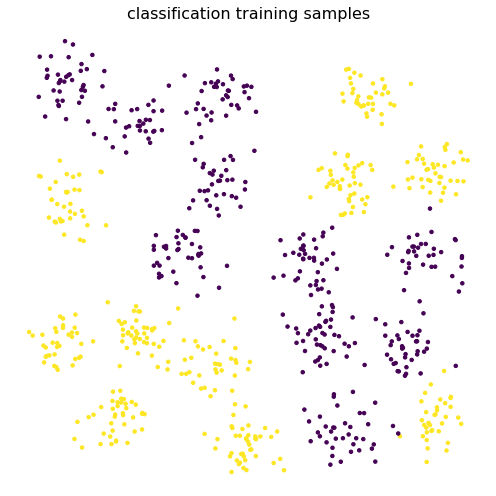

In [17]:
draw_samples(training_set, y_range,
             '{} training samples'.format(data_type))

In [18]:
import numpy as np


def categorical(samples, config):
    p = [np.count_nonzero(samples['y'] == c)
         for c in range(config['K'])]
    return np.array(p, dtype=float) / np.sum(p)


def error_rate(samples, config):
    return 1. - np.amax(categorical(samples, config))

In [19]:
training_config = {
    'min samples': 1,
    'max depth': np.inf,
    'distribution': categorical,
    'impurity': error_rate,
    'K': y_range[1] - y_range[0] + 1
}

In [20]:
from tree import train_tree


t = train_tree(training_set, 0, training_config)

In [21]:
def majority(p):
    return np.argmax(p)

In [22]:
def zero_one_loss(y, y_hat):
    return float(y != y_hat)

In [23]:
from tree import predict


def performance(t, summary, samples, loss):
    xs, ys = samples['x'], samples['y']
    ys_hat = [predict(x, t, summary) for x in xs]
    losses = [loss(y, y_hat) for y, y_hat in zip (ys, ys_hat)]
    risk = np.mean(losses)
    return risk

In [24]:
for which, samples in (
        ('training', classification_data['train']),
        ('test', classification_data['test'])
):
    risk = performance(t, majority, samples, zero_one_loss)
    print('{} {} risk {:.3f}'.format(data_type, which, risk))

classification training risk 0.000
classification test risk 0.012


### Problem 4.1

In [25]:
from tree import is_leaf

def count_leaves(tau):
    if not tau:
        return 0
    if is_leaf(tau):
        return 1
    return count_leaves(tau.right) + count_leaves(tau.left)

In [26]:
count_leaves(t)

51

### Problem 4.2

In [27]:
from draw import Box

In [28]:
def paint_subtree(tau, box, summary):
    if not tau:
        return
    if is_leaf(tau):
        value = summary(tau.p)
        box.paint(value)
        return
    thresh = tau.t
    if tau.j == 0:
        paint_subtree(tau.left, box.but_with(right = thresh), summary)
        paint_subtree(tau.right, box.but_with(left = thresh), summary)
    if tau.j == 1:
        paint_subtree(tau.left, box.but_with(up = thresh), summary)
        paint_subtree(tau.right, box.but_with(down = thresh), summary)
        
        

In [29]:
def paint_tree(tau, samples, summary, y_range, title=None):
    assert tau.j < 2, 'Can only draw two-dimensional trees'
    cmap = colormap(y_range)
    plt.figure(figsize=(8, 8), tight_layout=True)
    box = Box(samples['x'], cmap=cmap)
    plt.plot((box.left, box.right, box.right, box.left, box.left),
             (box.down, box.down, box.up, box.up, box.down), 'k',
             linewidth=0.5)
    paint_subtree(tau, box, summary)
    sample_plot(samples, cmap, 5)
    plt.axis('off')
    plt.axis('equal')
    if title is not None:
        title += ' ({} boxes)'.format(count_leaves(tau))
        plt.title(title, fontsize=16)
    plt.show()

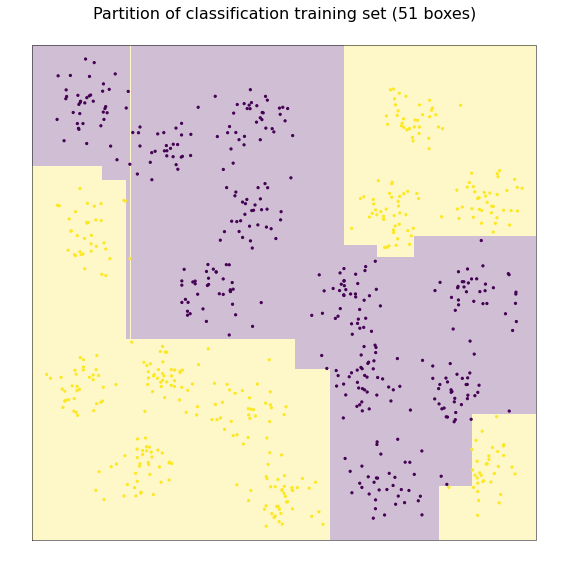

In [30]:
title = 'Partition of {} training set'.format(data_type)
paint_tree(t, training_set, majority, y_range=y_range, title=title)

### Problem 4.3

classification training risk 0.080
classification test risk 0.096


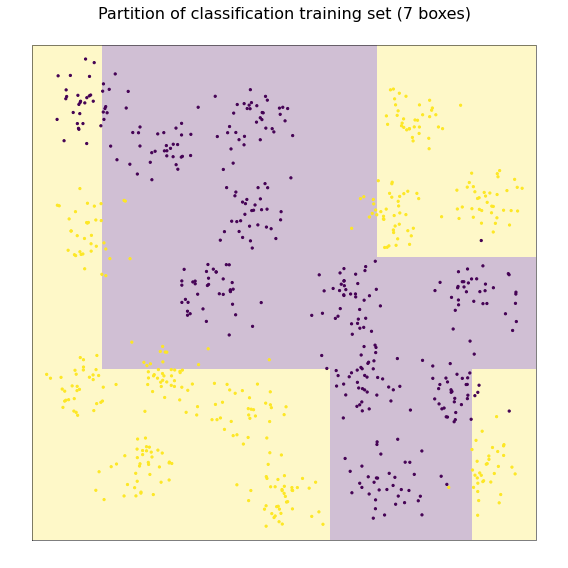

In [31]:
training_config_2 = {
    'min samples': 1,
    'max depth': 3,
    'distribution': categorical,
    'impurity': error_rate,
    'K': y_range[1] - y_range[0] + 1
}

t_2 = train_tree(training_set, 0, training_config_2)

for which, samples in (
        ('training', classification_data['train']),
        ('test', classification_data['test'])
):
    risk = performance(t_2, majority, samples, zero_one_loss)
    print('{} {} risk {:.3f}'.format(data_type, which, risk))
    
title = 'Partition of {} training set'.format(data_type)
paint_tree(t_2, training_set, majority, y_range=y_range, title=title)

## Part 5: Regression Trees 

In [32]:
regression_file = 'regression_data.pickle'
retrieve(regression_file)

with open(regression_file, 'rb') as file:
    regression_data = pickle.load(file)

Using previously downloaded file regression_data.pickle


In [33]:
training_set = regression_data['train']
y_range = regression_data['y range']
data_type = regression_data['type']

In [34]:
# training_set

### Problem 5.1

In [35]:
def normal(samples, _):
    return {'mean' : np.mean(samples['y']), 'variance' : np.var(samples['y'])}

def variance(samples, _):
    return np.var(samples['y'])

def mean(p):
    return p['mean']

def quadratic_loss(y, y_hat):
    return (y - y_hat) ** 2


regression training risk 0.000
regression test risk 4.395


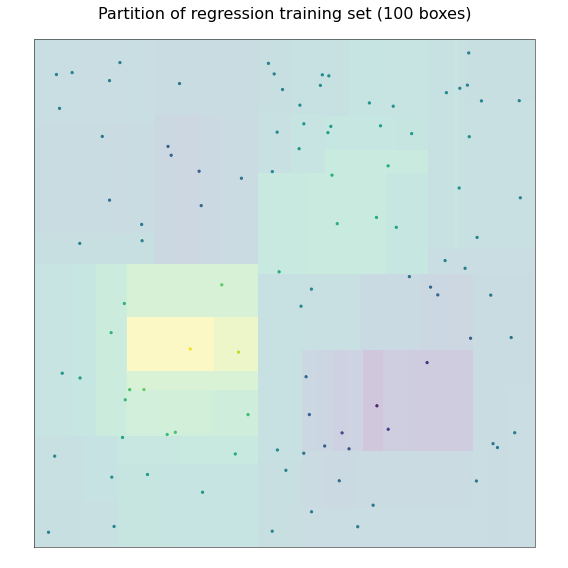

In [36]:
training_config_3 = {
    'min samples': 1,
    'max depth':np.inf,
    'distribution': normal,
    'impurity': variance,
    'K': y_range[1] - y_range[0] + 1
}

t_3 = train_tree(training_set, 0, training_config_3)

for which, samples in (
        ('training', regression_data['train']),
        ('test', regression_data['test'])
):
    risk = performance(t_3, mean, samples, quadratic_loss)
    print('{} {} risk {:.3f}'.format(data_type, which, risk))
    
title = 'Partition of {} training set'.format(data_type)
paint_tree(t_3, training_set, mean, y_range=y_range, title=title)

## Part 6: Random Decision Forests

In [37]:
spiral_file = 'spiral.pickle'
retrieve(spiral_file)
with open(spiral_file, 'rb') as file:
    spiral = pickle.load(file)

Using previously downloaded file spiral.pickle


In [38]:
from draw import coarse_regions

### Problem 6.1

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [40]:
h_1 = RandomForestClassifier(n_estimators=5,
                             max_depth = None,
                             min_samples_split=2,
                             random_state=0,
                             oob_score=True)


h_2 = RandomForestClassifier(n_estimators=500,
                             max_depth = None,
                             min_samples_split=2,
                             random_state=0,
                             oob_score=True)

/Users/Zhichen/miniconda3/envs/ece230/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


The accuracy with 5 trees is: 91.12
The out-of-bag accuracy as a percentage with 5 trees is: 65.25
The accuracy with 500 trees is: 96.0
The out-of-bag accuracy as a percentage with 500 trees is: 90.25


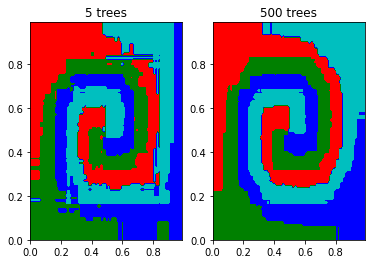

In [41]:
X = spiral['train']['x']
X_test = spiral['test']['x']
y = spiral['train']['y']
y_true = spiral['test']['y']

h_1.fit(X, y)
y_1_pred = h_1.predict(X_test)
acc_1 = accuracy_score(y_true, y_1_pred)
print("The accuracy with 5 trees is:", np.round(acc_1 * 100, 2))
print("The out-of-bag accuracy as a percentage with 5 trees is:", h_1.oob_score_ *100)

h_2.fit(X, y)
y_2_pred = h_2.predict(X_test)
acc_2 = accuracy_score(y_true, y_2_pred)
print("The accuracy with 500 trees is:", np.round(acc_2 * 100))
print("The out-of-bag accuracy as a percentage with 500 trees is:", h_2.oob_score_ *100)

plt.subplot(1, 2, 1)
plt.title("5 trees")
coarse_regions(h_1, spiral['labels'])

plt.subplot(1, 2, 2)
plt.title("500 trees")
coarse_regions(h_2, spiral['labels'])

### Problem 6.2 (Exam Style)

* Why is the OOB accuracy off when 5 trees are used? Be quantitative, and refer to the slides on random forests for this part.

The probability that a sample is not included in all bags, and therefore gets an OOB prediction is $p = 1 - (1 - 0.37)^M$ where $M$ is the number of trees. For 5 trees, $p$ approximates to 0.9 and the number of data points in $T'$ is $0.9 * 400 = 360$. This means that there are 40 points that are included in all bags, and therefore no trees can vote on these points when determining the OOB score. This is why the warning message says that some points do not have OOB scores.

* How good is the OOB accuracy estimate with 500 trees? Compare it with the test accuracy. Which one is more reliable?

The OOB accuracy with 500 trees is 90.25 and the test accuracy is 96.48. Not only is the test accuracy higher, it is also measured for 4000 points against the 400 used for the OOB score. If picked randomly from the same distribution, the accuracy calculated for a larger amount of points (4000) will be more reliable than one calculated with fewer points (400).

* How do the two sets of decision regions and the corresponding test accuracy values compare to each other, qualitatively?

The 5-tree decisions regions are more jagged and sparce, whereas the 500-tree decisions regions are smoother. The test accuracy of the 500-tree forest is bigger than that of the 5-tree forest (96.47 and 91.12, respectively).